### Numpy arrays

In this notebook, we will explore a few exercises to use numpy arrays. The solutions to these exercises **might not be unique**. However, more often then not, some solutions are better than other. Typically, a better solution involves doing the same with fewer lines of code (although this is not always and generally true, so take this with a pinch of salt! 

As usual, the solutions will be uploaded to the solution folder next week.

In some of these exercises, we also need the library `time` to calculate the time some function require to perform their operation.
the method `time.time()` returns the current time in seconds, see the documentation [here](https://www.tutorialspoint.com/python3/time_time.htm)

In [2]:
# First, run this cell to load numpy 
import numpy as np

# We also need the library time to calculate the time some function require to perform their operation.
# the method time.time() returns the current time in seconds

import time

In the following cell, write two functions. The first, fun1, takes as input two lists with the same number of elements and sum them up. The second, fun2, takes two numpy arrays again of the same length, and sum them up.  
**IMPORTANT**: In defining the second function, you **cannot** use any loop but rather you need to use the properties of numpy arrays. (To use it later, remember to run the cell with the function definition!)

In [4]:
#Define your functions here:

def fun1( l1, l2 ):
    "This function takes lists as inputs"
    #write your code here
    sum1 = []
    for i in range(len(l1)):
        sum1.append(l1[i] + l2[i])
    return sum1

def fun2( ar1, ar2 ):
    "this uses numpy arrays"
    #write your code here. The optimal solution requires a single line of code!
    sum1 = ar1 + ar2
    return sum1

# using regular lists
a = [1, 2, 3, 4, 5]
b = [4, 5, 6, 7, 8]
c = fun1(a, b)
print(c)
print(type(c))

# using numpy
d= np.array([1, 2, 3, 4, 5], dtype=float)
e= np.array([4, 5, 6, 7, 8], dtype=float)
f= fun2(d, e)
print(f)

[5, 7, 9, 11, 13]
<class 'list'>
[ 5.  7.  9. 11. 13.]


In [8]:
# The following command generates two very large lists of random numbers, with 10^6 elements. Running this cell, if the function definition above is correct, should print the same total. However, one of the two might take a longer time...have a look at what difference in speed you obtain!

NN = 10**6
a1 = np.random.rand( NN )
a2 = np.random.rand( NN )

x1 = list( a1 ) # This is to transform an array object into a Python list!
x2 = list( a2 ) # This is to transform an array object into a Python list!

# This performs the operation with lists

t1 = time.time()
tot = fun1( x1, x2 )
t2 = time.time()
t_list = t2 - t1
# Changed the line below compared to orig. exercise to avoid printing huge lists
print(  "Time using lists {0:.5f}".format( t_list ) )

t1 = time.time()
tot = fun2( a1, a2 )
t2 = time.time()
t_array = t2 - t1
# Changed the line below compared to orig. exercise to avoid printing huge lists
print(  "Time using numpy arrays {0:.5f}".format( t_array ) )

print("Increase in performance using arrays = t_lists / t_array : {0:.5f} ".format( t_list / t_array ) )



Time using lists 0.16464
Time using numpy arrays 0.04704
Increase in performance using arrays = t_lists / t_array : 3.49999 


Making use of numpy methods, define a function that takes two arrays `a` and `b` as input and does the following:

1. Orders the array values by size. 
2. Multiply the lowest element of the array `a` by the largest element of `b`,
   then the second lowest of `a` with the second largest of `b` and so on. Store these product in another array `c`
3. Return the index and the value of the minimum among all elements in `c`

In [22]:
def myFun( a, b ):
    #write your code here 
    c = np.sort(a) * np.sort(b)[::-1]
    index = np.argmin(c)
    return index, c[ index ]

In [23]:
# You can literally calculate the solution by hand with the values in the arrays below 
# and then compare to what you would obtain running the code here. This is useful to evaluate if 
# you coded correctly.

a = np.array( [ 4, 1, 2 ] )
b = np.array( [ 1, 0.2, 1.1 ] )

print( myFun( a,b ) )

(2, 0.8)


Using numpy arrays and functions, write a compact code to calculate 
numerically the integral of the sine function between two values `x1` and `x2`.
You should do this by diving the interval into `NN` subintervals equally spaced
by a quantity `deltaX` of your choice. Then calculate the value of the function 
at each point and sum it up (basically, use the definition of the Riemann integral)

In doing this, you should use numpy arrays and functions. This can be coded in less then
3 lines or even less (in between the def and return ones)...

You should run the next cell using some value of your choice for `x1` and `x2` and see if 
the result is indeed what you expect.



In [18]:
def integrateSine( x1, x2, deltaX ):
    #write your code here
    x = np.arange(x1, x2, deltaX)
    integral = np.sum(np.sin(x) * deltaX)
    return integral

In [19]:
# Substitute x1 and x2 and check here if you get
integral = integrateSine( x1 = 0, x2 = np.pi, deltaX = 0.0001 )
print( integral )

1.999999998673669


**More advanced exercise**

The function `np.random.rand( NN )` returns `NN` random value between 0 and 1. You should use it to calculate the value of $\pi$ numerically using the following Monte Carlo algorithm coded in a function using numpy arrays.
1. Generate two lists each with `NN` random numbers between 0 and 1. These lists correspond to the x and y coordinate of a point.
2. Transform these coordinates so that each x and y value is still random but between -1 and 1
3. Check the distance of each point from the origin in (0,0). If it is larger than 1, discard the point. 
4. Your approximate value for $\pi$ is the fraction of points which were NOT discarded by the in the previous procedure, multiplied by 4.

Why? Take a circle of radius 1, you can inscribe it into a square of length 2. The value of 
the area of the circle will be $\pi$. The value of the area of the square is 4. The fraction of the 
points that are closer to the origin than 1 to the total number of points is equal to the ratio between the two areas


In [78]:
def calculatePi( NN ):
    #write your code here
    rand_var = np.random.rand(NN, 2) * 2 - 1
    dist_from_origin = np.sqrt(rand_var[:,0] ** 2 + rand_var[:,1] ** 2)    # np.linalg.norm would alsos work here
    not_discarded = dist_from_origin[dist_from_origin < 1.0]
    estimate = 4 * not_discarded.size / dist_from_origin.size
    return estimate

In [79]:
# Run the previous function to calculate the value of Pi using different 
# number of points

print( "Pi using 10^2 points {0}".format( calculatePi( 100 ) ) )
print( "Pi using 10^3 points {0}".format( calculatePi( 1000 ) ) )
print( "Pi using 10^4 points {0}".format( calculatePi( 10000 ) ) )
print( "Pi using 10^5 points {0}".format( calculatePi( 100000 ) ) )

Pi using 10^2 points 3.32
Pi using 10^3 points 3.112
Pi using 10^4 points 3.1264
Pi using 10^5 points 3.14552


Define two functions. The first `funL` assumes the input as Python lists of equal length. 
It should first take the element by element product of the two lists. 
If this value is bigger than 0, it takes the square root and sum this number to a counter. Finally, the function returns the value of the counter once all elements have been considered.

The second, `funA` function should do the same, but assume Python arrays are given. It should not use any loop and be written as a single line of code between the lines starting with `def` and `return` lines.


In [82]:

def funL( l1, l2 ):
    #write your code here
    counter = 0
    for i in range(len(l1)):
        curr_value = l1[i] * l2[i]
        if curr_value > 0:
            counter += curr_value ** 0.5
    return counter

def funA( l1, l2 ):
    #write your code here....Just one line needed!
    counter = np.sum(np.sqrt((l1 * l2)[l1 * l2 > 0]))
    return counter   

In [83]:
# The following command generates two lists of random numbers. Running this cell 
# if your previous code is correct should print the same value twice
NN = 10000
x1 = list( np.random.rand( NN ) )
x2 = list( np.random.rand( NN ) )

# With lists
tot = funL( x1, x2 )

print( tot )
# With equivalent numpy arrays 
ar1 = np.array( x1 )
ar2 = np.array( x2 )
tot = funA( ar1, ar2 )

print( tot )

4418.659360505176
4418.659360505185


In the file `data.txt` provided in the folder (which should be downloaded in the same folder as 
this Jupyter notebook to work!) we can see a time series of electric currents measured during 
an experiment on a battery as a set of `( t, I(t))` pairs, where `t` is time and `I(t)` the current measured at 
that time. If you open the file, you will see that the time values are basically random.  

Making use of masked arrays (so without using the `np.sort(x)` function or ordering the arrays!) write a function that make a plot where all the data gathered before a certain critical time `tcritical` are represented as a blue point, and all the other using a green point.

**A couple of notes / hints**  

1. `np.logical_not( x )` returns False if x is True, and True if x is False

2. You need to load the pylab package...it can be done (as you should know already!) by from matplotlib import pylab as plt 
and then using the `plt.plot()` function.

None


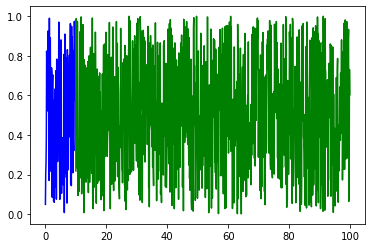

In [10]:
import numpy.ma as ma
from matplotlib import pylab as plt

data = np.loadtxt( "data.txt", skiprows = 1 )

def plotData( data, tcritical ):
    #write your code here
    condition = data[:,0] < tcritical
    plot_blue = ma.masked_array(data[:,1], np.logical_not(condition))
    plot_green = ma.masked_array(data[:,1], condition)
    plt.plot(data[:,0], plot_blue,'b')
    plt.plot(data[:,0], plot_green,'g')
    return 

tcritical = 10
print( plotData( data, tcritical ) )

**More advanced exercise**

Write a program that takes as input an array of zeros and ones, and generate a new array following these steps:

1. For all points except the first and last, look at the neighbouring points in the array and does the following: if both of the neighbours is 1, set the value of the array to 1, otherwise leave the value as it is.
2. Recursively apply the previous step for NN steps and record the average and standard deviation of the array values as a function of the number of iteration.

Use the values recorded to make a plot of as a function of the number of iterations. What do you see? What is the effect of the fixed values (if any)?

**Variant**: instead of the rule in step 1, set an array element to 1 if any of its neighbours are 1 and 0 otherwise. What do you observe here?



i=0: mean = [0.5016]
i=0: stdev = [0.49999744]
i=1: mean = [0.6221]
i=1: stdev = [0.48486244]
i=2: mean = [0.6221]
i=2: stdev = [0.48486244]
i=3: mean = [0.6221]
i=3: stdev = [0.48486244]
i=4: mean = [0.6221]
i=4: stdev = [0.48486244]
i=5: mean = [0.6221]
i=5: stdev = [0.48486244]
i=6: mean = [0.6221]
i=6: stdev = [0.48486244]
i=7: mean = [0.6221]
i=7: stdev = [0.48486244]
i=8: mean = [0.6221]
i=8: stdev = [0.48486244]
i=9: mean = [0.6221]
i=9: stdev = [0.48486244]


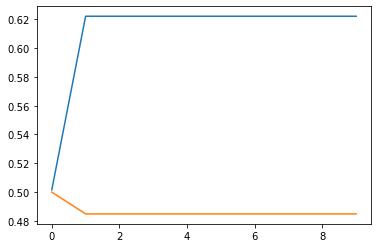

In [13]:
def myFunc(arr, NN):
    stdev = np.zeros([NN, 1])
    mean = np.zeros([NN, 1])
    steps = range(NN)
    for i in steps:
        condition =  np.concatenate(([0], np.logical_and((arr[:-2] == 1), (arr[2:] == 1)), [0]))
        #condition =  np.concatenate(([0], np.logical_or((arr[:-2] == 1), (arr[2:] == 1)), [0]))    # variant
        mean[i] = np.mean(arr)
        print("i={0}: mean = {1}".format(i, mean[i]))
        stdev[i] = np.std(arr)
        print("i={0}: stdev = {1}".format(i, stdev[i]))
        arr[condition == 1] = 1
        #arr[condition == 0] = 0    # uncomment for variant
    plt.plot(steps,mean)
    plt.plot(steps,stdev)
    return
        
# generate random binary array
a = np.random.randint(2, size=10000)
myFunc(a, 10)